In [2]:
%run ImportData.ipynb

In [3]:
#IMPORTATION DES DONNEES EXPERTISEES
donnees,quanti,quali=FonctionImportDonnees("https://raw.githubusercontent.com/etudiantdatascience/TER-reduction-dimension/master/Data/semis.xlsx")

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 28 09:15:46 2019

@author: bellec
"""
#IMPORTATION DES LIBRAIRIES

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

8
Variance expliquée: [0.28547432 0.19008238 0.12556516 0.11337702 0.10682303 0.09972739
 0.06692139 0.01202932]


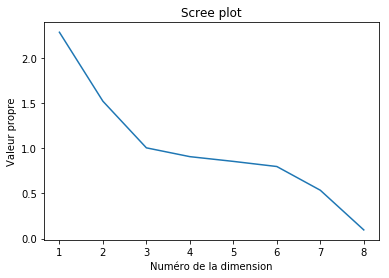

In [6]:
X=donnees[quanti]
(n,p)=X.shape

#classe pour standardisation

#instanciation
sc = StandardScaler()
#transformation
Z = sc.fit_transform(X)
#print(Z)

#classe pour l'ACP
acp = PCA()

coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) 

eigval = (n-1)/n*acp.explained_variance_
#print(eigval)

print("Variance expliquée:",acp.explained_variance_ratio_)

plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Valeur propre")
plt.xlabel("Numéro de la dimension") #Factor number
plt.show()

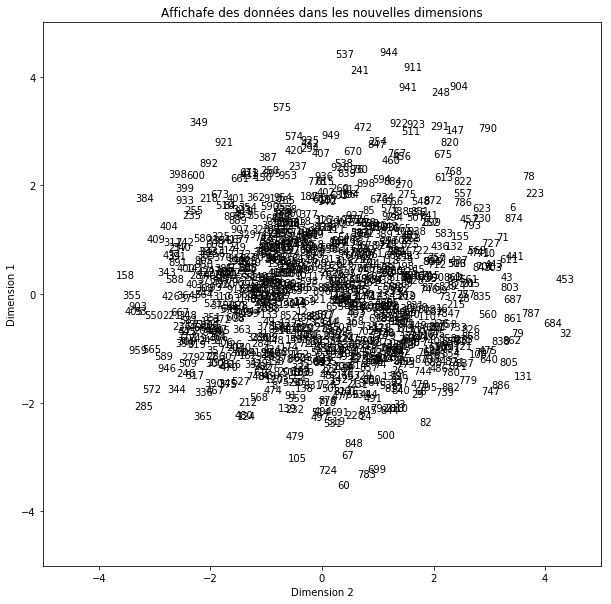

In [7]:
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-5,5) 
axes.set_ylim(-5,5) 
#et en ordonnée
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
plt.title("Affichafe des données dans les nouvelles dimensions")
plt.ylabel("Dimension 1")
plt.xlabel("Dimension 2")
plt.show()

      ID        d_i
0      0   4.050528
1      1  10.280343
2      2   4.689448
3      3   8.993589
4      4  10.588176
5      5   7.801584
6      6  28.137342
7      7   9.384387
8      8   5.728828
9      9   7.542602
10    10   2.435055
11    11   6.457832
12    12   4.064292
13    13   3.716893
14    14   4.144038
15    15   6.114405
16    16   7.861380
17    17   3.807993
18    18   2.982819
19    19   3.718160
20    20   4.861753
21    21   3.930690
22    22   7.553321
23    23   4.019099
24    24   7.069128
25    25   8.624706
26    26   6.148973
27    27   5.220709
28    28   9.264121
29    29   8.003261
..   ...        ...
928  929   6.867812
929  930   7.131888
930  931   9.837112
931  932   8.302101
932  933  12.097884
933  934   5.596396
934  935  13.590098
935  936  10.036691
936  937   9.135910
937  938  13.353356
938  939   8.487630
939  940   9.013993
940  941  21.282928
941  942   6.230671
942  943   8.338213
943  944  25.985209
944  945   4.162466
945  946  11.958386


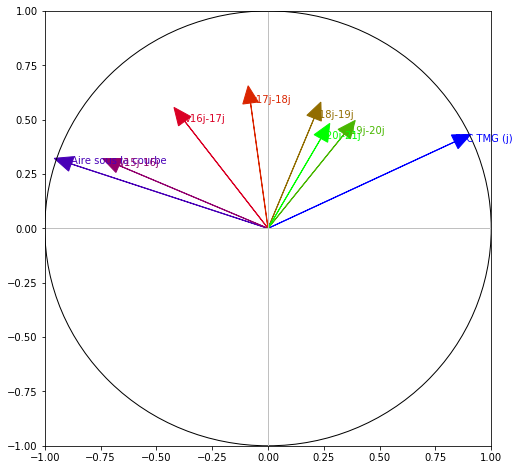

In [10]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs
#print(corvar)
    
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

couleur=plt.cm.brg(np.linspace(0, 1, len(quanti)))
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]),color=couleur[j])
    axes.arrow(0, 0, corvar[j,0],corvar[j,1], head_width=0.07, head_length=0.08, fc=couleur[j], ec=couleur[j])
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
#affichage
#plt.savefig('Cercle de corrélation.png')
plt.show()

In [9]:

cos2var = corvar**2
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print("\n")
print("Contribution des variables aux axes:",'\n')
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

#Question: pertinence de v15-16j ?



Contribution des variables aux axes: 

                    id     CTR_1     CTR_2
0          5°C TMG (j)  0.306260  0.104171
1  Aire sous la courbe  0.340739  0.057818
2             v15j-16j  0.195090  0.054966
3             v16j-17j  0.060963  0.159577
4             v17j-18j  0.002684  0.218543
5             v18j-19j  0.018676  0.168816
6             v19j-20j  0.051014  0.123713
7             v20j-21j  0.024574  0.112396
